# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units=metric&q={city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | ilulissat
Processing Record 3 of Set 1 | vorgashor
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | tobelo
Processing Record 6 of Set 1 | alice springs
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | pitimbu
Processing Record 9 of Set 1 | atafu village
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | corinto
Processing Record 12 of Set 1 | dolni dabnik
Processing Record 13 of Set 1 | quatre cocos
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | mount pearl
Processing Record 17 of Set 1 | joshimath
Processing Record 18 of Set 1 | aasiaat
Processing Record 19 of Set 1 | gadzhiyevo
Processing Record 20 of Set 1 | blackmans bay
Processing Record 21 of Set 1 | banda aceh
Processing Record 22 of Set 1

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
print(city_data_df)



                  City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0          olonkinbyen  70.9221   -8.7187      2.80        91          95   
1            ilulissat  69.2167  -51.1000     13.01        47           0   
2            vorgashor  67.5833   63.9500     15.66        77          87   
3             waitangi -43.9535 -176.5597      9.34        91          99   
4               tobelo   1.7284  128.0095     25.83        85          98   
..                 ...      ...       ...       ...       ...         ...   
594           portmore  17.9702  -76.8672     32.98        66          20   
595              hotan  37.0997   79.9269     29.80        22          74   
596           dengzhou  37.8086  120.7508     23.44        97          97   
597           la sarre  48.8002  -79.1996     18.03        68          76   
598  sofo-birnin-gwari  11.0154    6.7804     24.97        80          97   

     Wind Speed Country        Date  
0          2.57      SJ  1721237499  

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,2.80,91,95,2.57,SJ,1721237499
1,ilulissat,69.2167,-51.1000,13.01,47,0,1.54,GL,1721237501
2,vorgashor,67.5833,63.9500,15.66,77,87,0.19,RU,1721237502
3,waitangi,-43.9535,-176.5597,9.34,91,99,1.34,NZ,1721237503
4,tobelo,1.7284,128.0095,25.83,85,98,3.79,ID,1721237504


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,2.80,91,95,2.57,SJ,1721237499
1,ilulissat,69.2167,-51.1000,13.01,47,0,1.54,GL,1721237501
2,vorgashor,67.5833,63.9500,15.66,77,87,0.19,RU,1721237502
3,waitangi,-43.9535,-176.5597,9.34,91,99,1.34,NZ,1721237503
4,tobelo,1.7284,128.0095,25.83,85,98,3.79,ID,1721237504


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

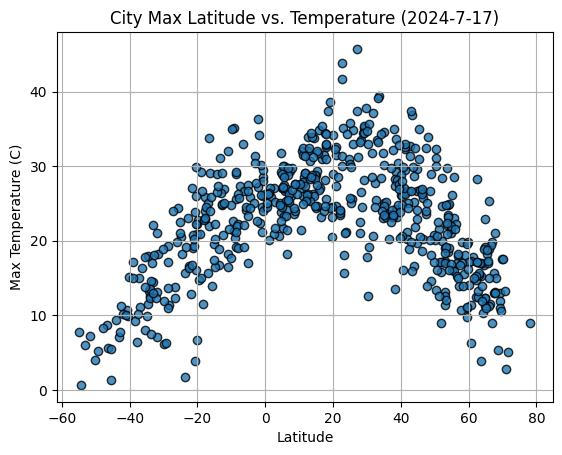

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor = "black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-7-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

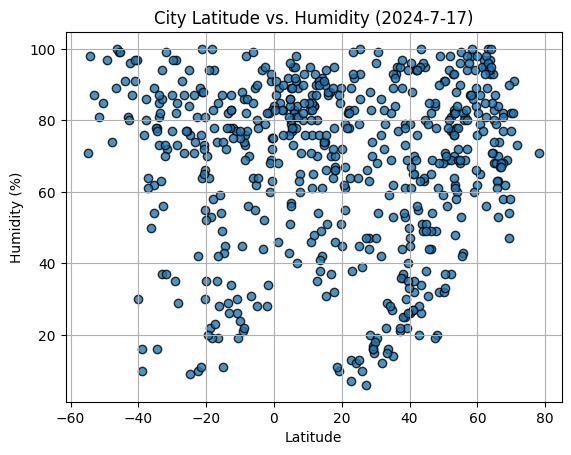

In [13]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors = "black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-7-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

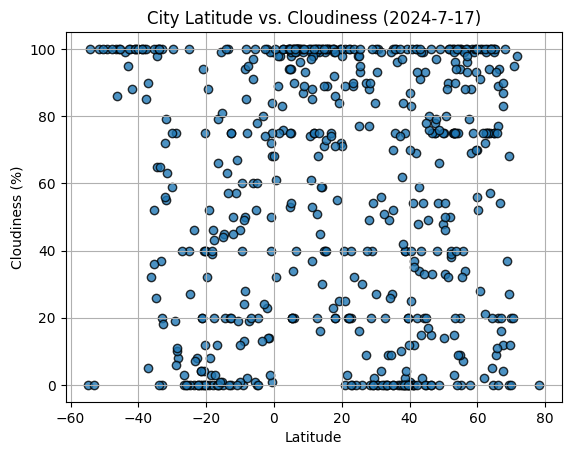

In [14]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors = "black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-7-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

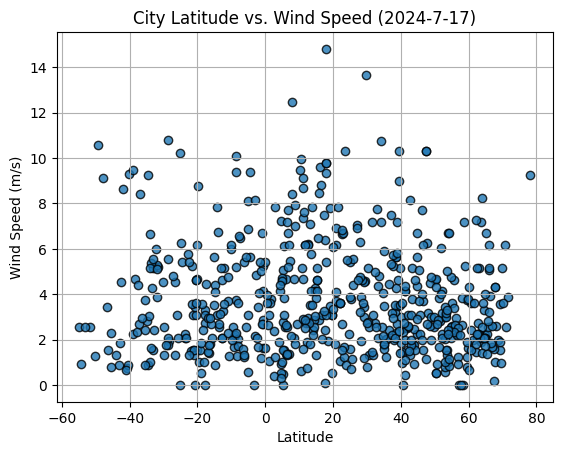

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors = "black", alpha = 0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-7-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    regress_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    
    equation_text = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.text(text_coordinates[0], text_coordinates[1], equation_text, fontsize = 12, color = "red")
   
    print(f"The r-squared is: {rvalue}")
    plt.show()


In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,2.80,91,95,2.57,SJ,1721237499
1,ilulissat,69.2167,-51.1000,13.01,47,0,1.54,GL,1721237501
2,vorgashor,67.5833,63.9500,15.66,77,87,0.19,RU,1721237502
4,tobelo,1.7284,128.0095,25.83,85,98,3.79,ID,1721237504
6,georgetown,5.4112,100.3354,29.97,77,20,1.54,MY,1721237507


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,9.34,91,99,1.34,NZ,1721237503
5,alice springs,-23.7000,133.8833,1.75,87,0,2.06,AU,1721237505
7,pitimbu,-7.4706,-34.8086,27.33,70,19,6.46,BR,1721237508
8,atafu village,-8.5421,-172.5159,28.90,73,94,10.09,TK,1721237509
9,port-aux-francais,-49.3500,70.2167,5.18,97,100,10.58,TF,1721237510


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.5940967564389171


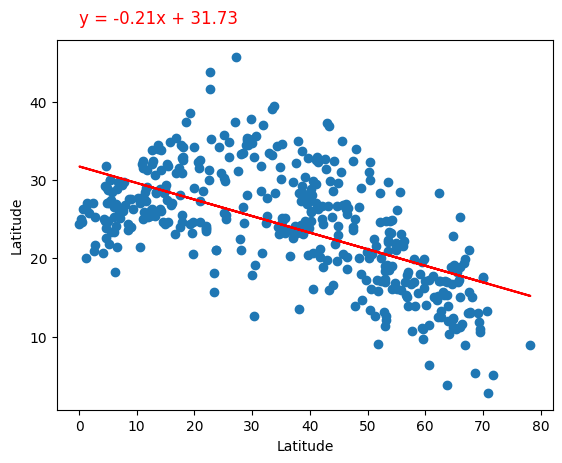

In [33]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp", "Latitude", (0, 50))

The r-squared is: 0.7835789777963819


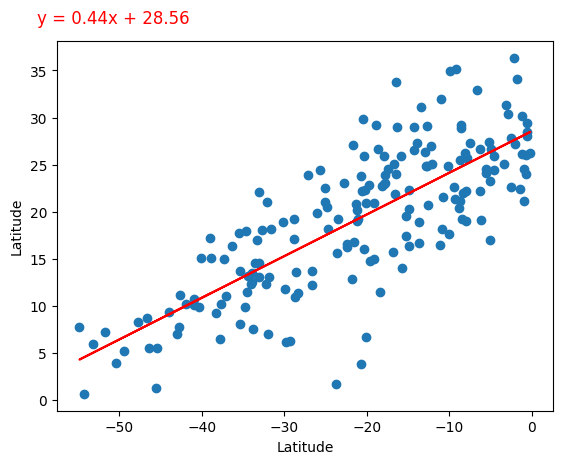

In [35]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp", "Latitude", (-60, 40))

**Discussion about the linear relationship:** 
Northern Hemisphere:
The slope of −0.21 shows a negative linear relationship between latitude and the dependent variable. As latitude increases, the dependent variable decreases. The points arescattered around the regression line, indicating a moderate linear relationship. There is visible variability, but the downward trend is clear.

Southern Hemisphere: 
The slope of 0.44 shows a positive linear relationship between latitude and the dependent variable. As latitude increases, the dependent variable also increases. The points are more tightly clustered around the regression line compared to the first chart, indicating a stronger linear relationship. There is less variability around the line.


### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.028815462295918838


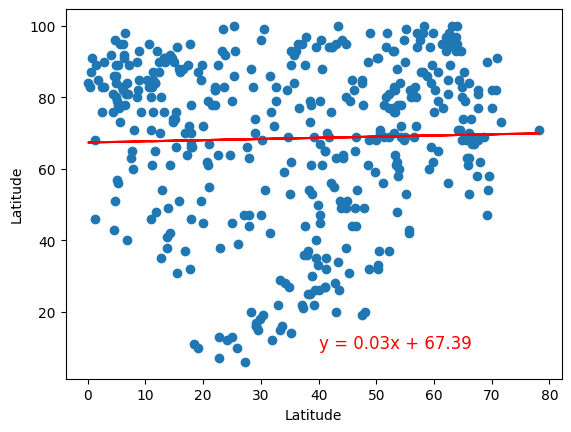

In [36]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", "Latitude", (40, 10))

The r-squared is: -0.18083529997865336


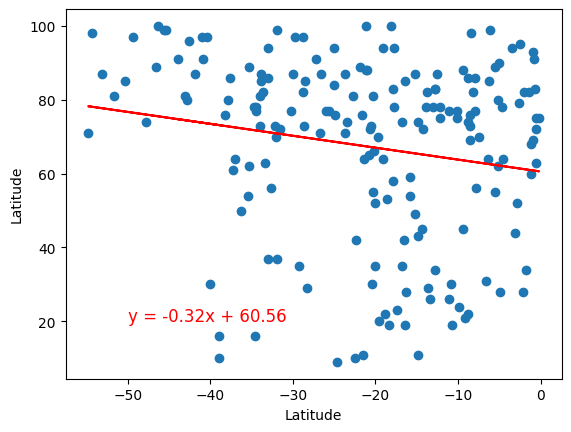

In [37]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", "Latitude", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.18553243915592954


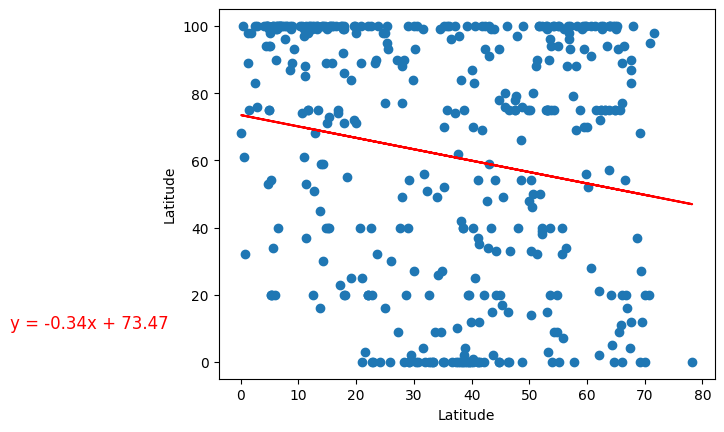

In [42]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", "Latitude", (-40, 10))

The r-squared is: -0.26313325199024706


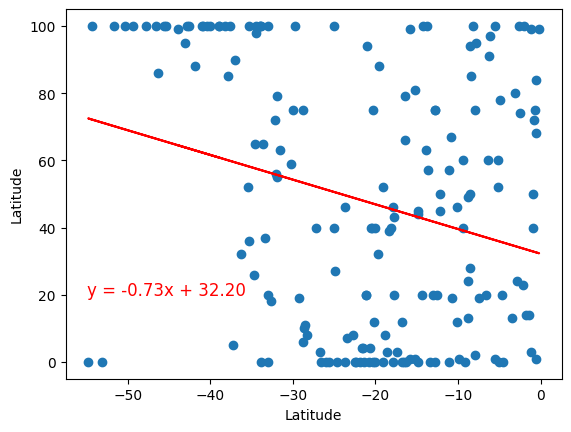

In [41]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", "Latitude", (-55, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.19363850094459303


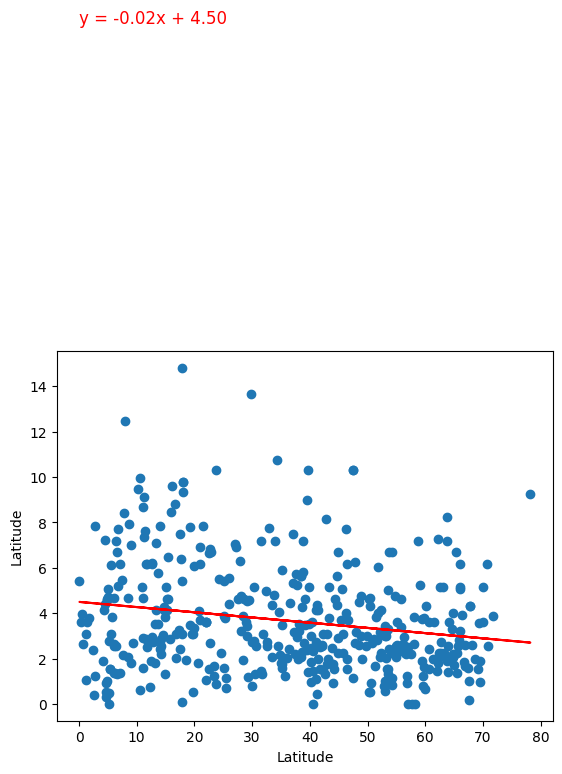

In [43]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", "Latitude", (0, 30))

The r-squared is: 0.009638206713060354


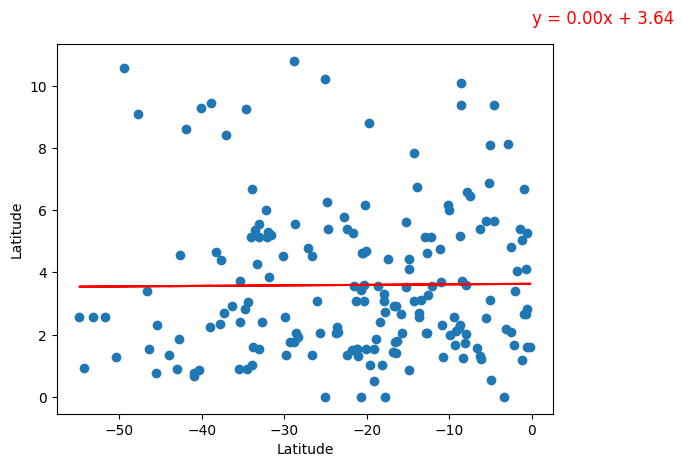

In [48]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", "Latitude", (0, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE